In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_excel('Individual SKU Consumption Price and Start of Week.xlsx')


In [24]:
data.head()

,Unnamed: 0,SKU,Platform,Region,start_of_week,end_of_week,consumption,avg_price
0,0,34 KH Orig Dnr 32pk 7343507032,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,0,0.000000
1,1,22 KH Orig Dnr 24pk 7343500230,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,241644,4.685770
2,2,29 KH Svry Btr Dnr 24pk 7343500233,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,3729,4.491360
3,3,31 KH Orig Dnr 18pk 7343507018,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,1519,3.474829
4,4,19 KH Orig Dnr 12pk 7343500004,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,634965,3.374439


In [31]:
data2=pd.read_excel('kh file1 5 YR MEDIA SPEND TRACK.xlsx',sheet_name='Sheet2')

In [32]:
data2.head()

,year,total spend
0,2016,17545233.00
1,2017,20006341.06
2,2018,19956189.12
3,2019,21600826.71
4,2020,16713979.39


In [10]:
data['year']=data['start_of_week'].dt.year
data.head()

,Unnamed: 0,SKU,Platform,Region,start_of_week,end_of_week,consumption,avg_price,year
0,0,34 KH Orig Dnr 32pk 7343507032,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,0,0.000000,2015
1,1,22 KH Orig Dnr 24pk 7343500230,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,241644,4.685770,2015
2,2,29 KH Svry Btr Dnr 24pk 7343500233,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,3729,4.491360,2015
3,3,31 KH Orig Dnr 18pk 7343507018,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,1519,3.474829,2015
4,4,19 KH Orig Dnr 12pk 7343500004,Dinner roll,Total US - Multi Outlet,2015-01-05,2015-01-11,634965,3.374439,2015


In [17]:
consumption=data.groupby('year').agg({'consumption':'sum'}).reset_index().loc[consumption['year']!=2015]

In [55]:
consumedia= pd.merge(consumption, data2, on='year')
consumedia['consumption per spend']=consumedia['consumption']/consumedia['total spend']
consumedia

,year,consumption,total spend,consumption per spend
0,2016,201842497,17545233.00,11.504122
1,2017,210406218,20006341.06,10.516976
2,2018,217525536,19956189.12,10.900154
3,2019,216390170,21600826.71,10.017680
4,2020,143623548,16713979.39,8.593019


In [93]:
plt.figure(figsize=(20,10))
fig = go.Figure()
fig.add_trace(go.Bar(
    x = consumedia['year'],
    y = consumedia['consumption per spend'],
    width=0.5,
    name='Consumption per media spend'
))
fig.add_trace(go.Scatter(x = consumedia['year'],y = consumedia['consumption per spend'],mode = 'lines',line = dict(color = 'rgb(189,189,189)')))
fig.add_trace(go.Scatter(x = consumedia['year'],y = consumedia['consumption per spend'],mode = 'markers',marker = dict(color = 'black')))
fig.update_layout(
    title='Consumption per media spending dollar',
    xaxis_title='Year',
    yaxis_title='Consumption/media spend',
    xaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    yaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    plot_bgcolor='white',
    showlegend = False
)

<Figure size 1440x720 with 0 Axes>

In [94]:
plt.figure(figsize=(20,10))
fig = go.Figure()
fig.add_trace(go.Bar(
    x = consumedia['year'],
    y = consumedia['consumption'],
    width=0.5,
    name='Consumption'
))
fig.update_layout(
    title='Consumption',
    xaxis_title='Year',
    yaxis_title='Consumption',
    xaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    yaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    plot_bgcolor='white',
    showlegend = False
)

<Figure size 1440x720 with 0 Axes>

In [101]:
plt.figure(figsize=(5,3))
fig = go.Figure()
fig.add_trace(go.Bar(
    x = consumedia['year'],
    y = consumedia['total spend'],
    width=0.5,
    marker = dict(color = ['pink', 'pink','pink','pink','pink']),
    name='Consumption'
))
fig.update_layout(
    title='total spend',
    xaxis_title='Year',
    yaxis_title='Total Media Spending for Each Year',
    xaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    yaxis=dict(
    showline=True,
    showgrid=False,
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82, 82, 82)',
        )
    ),
    plot_bgcolor='white',
    showlegend = False
)

<Figure size 360x216 with 0 Axes>

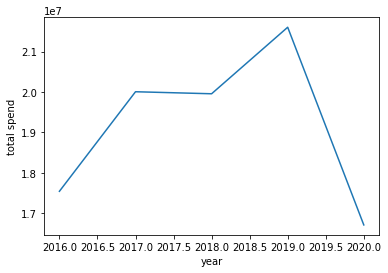

In [39]:
sns.lineplot(x="year", y="total spend",data=consumedia,dashes=False,ci=0)